## Time province

3/30일자 데이터를 사용하였다

province를 통해 교통량과 확진자 수와의 관계,
확진자 증가추이가 비슷한 곳끼리는 무슨 연관이 있을까,
여러가지 요인들을 확진자수와 묶어 비교를 해보자(지역내 대중교통 이용량,지역간 대중교통 이용량,항공량(해외,국내)

먼저 그냥 확진자수로 하기에는 지역마다 사는 인구수가 다르므로 공공데이터 포털에서 사용하는 10만명당 확진자 비율을 구해보았다.

In [25]:
import pandas as pd
import numpy as np
import matplotlib as mpl
mpl.rc('font',family='NanumGothic')
time_province=pd.read_csv('data/TimeProvince.csv')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy

In [26]:
aaa=10**4
#깔끔한 계산을 위해 10만 자리에서 반올림 해주었다.
num_citizen={'Seoul':980*aaa,'Busan':350*aaa,'Chungcheongbuk-do':160*aaa,'Chungcheongnam-do':210*aaa
            ,'Daegu':250*aaa,'Daejeon':150*aaa,'Gangwon-do':160*aaa,'Gwangju':150*aaa
            ,'Gyeonggi-do':1350*aaa,'Gyeongsangbuk-do':270*aaa,'Gyeongsangnam-do':340*aaa,'Incheon':290*aaa
            ,'Jeju-do':60*aaa,'Jeollabuk-do':190*aaa,'Jeollanam-do':190*aaa,'Sejong':30*aaa
            ,'Ulsan':120*aaa}
#Percentage of Confirmed Persons per 100,000= pocp
def con_ratio(a):
    return num_citizen[a]
time_province['num_of_citizen']=time_province['province'].apply(con_ratio)
#소수 2번째 자리까지만 표현
time_province['pocp']=round(time_province['confirmed']/time_province['num_of_citizen']*aaa*10,2)
#time_province.drop('time',axis=1,inplace=True)
time_province.tail(20)

,date,time,province,confirmed,released,deceased,num_of_citizen,pocp
1051,2020-03-21,0,Gyeongsangbuk-do,1243,395,24,2700000,46.04
1052,2020-03-21,0,Gyeongsangnam-do,87,40,0,3400000,2.56
1053,2020-03-21,0,Jeju-do,4,2,0,600000,0.67
1054,2020-03-22,0,Seoul,324,64,0,9800000,3.31
1055,2020-03-22,0,Busan,108,69,1,3500000,3.09
1056,2020-03-22,0,Daegu,6387,2107,75,2500000,255.48
1057,2020-03-22,0,Incheon,40,8,0,2900000,1.38
1058,2020-03-22,0,Gwangju,19,10,0,1500000,1.27
1059,2020-03-22,0,Daejeon,24,6,0,1500000,1.60
1060,2020-03-22,0,Ulsan,36,12,0,1200000,3.00


시각화를 해보자

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.]),
 <a list of 9 Text xticklabel objects>)

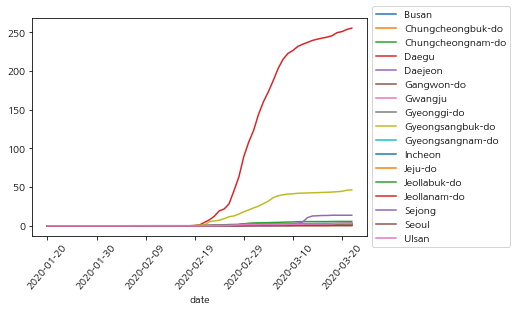

In [27]:
a=time_province.pivot('date','province')['pocp']
a.plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=50)

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.]),
 <a list of 9 Text xticklabel objects>)

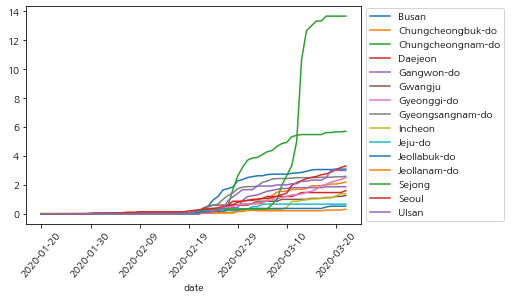

In [28]:
#대구 경북제외
a=time_province.pivot('date','province')['pocp'].drop(['Daegu','Gyeongsangbuk-do'],axis=1)
a.plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=50)

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.]),
 <a list of 9 Text xticklabel objects>)

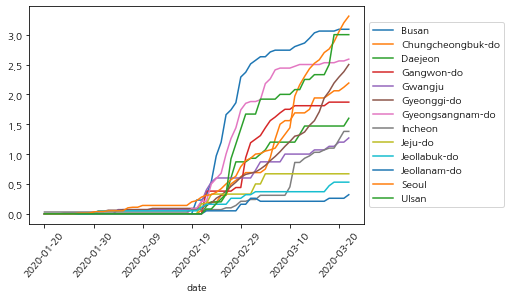

In [29]:
a=time_province.pivot('date','province')['pocp'].drop(['Daegu','Gyeongsangbuk-do','Sejong','Chungcheongnam-do'],axis=1)
a.plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=50)

## 대구와의 거리

3월22일 마지막 누적 확진자 수를 이용해 약간 코로나의 중심지라고 생각되는 대구와 각지역의 거리가 확진자 수와 연관이 있는지 보자

각 지역간의 거리를 구하기 위해 Region에 있는 위도 경도를 가지고 올려고 한다.
- 저번에 사용한 함수를이용해 지역을 광역시/특별시/도 기준으로 묶고 위도와 경도를 가져올려고한다.

In [30]:
region=pd.read_csv('data/region.csv')

In [31]:
a=list(set(time_province['province'].values))
def con_city(city):
    if '_all' in city:
        if city=='Gangwon_all':
            return (city[:len(city)-4]+'-do')
        else:
            return (city[:len(city)-4])
    else:
        return (city)
region['city']=region['city'].apply(con_city)
region=region.set_index('city').loc[a]


In [32]:
region

,code,province,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
city,,,,,,,,,,,
Chungcheongnam-do,41000,Chungcheongnam-do,36.658976,126.673318,409,499,21,1.38,18.40,8.9,3641
Busan,11000,Busan,35.179884,129.074796,304,408,22,1.40,18.41,8.6,6752
Daegu,12000,Daegu,35.872150,128.601783,229,355,11,1.62,15.78,7.5,5083
Gyeonggi-do,20000,Gyeonggi-do,37.275119,127.009466,1277,2237,61,1.60,12.63,5.2,20491
Jeollabuk-do,50000,Jeollabuk-do,35.820308,127.108791,419,519,19,2.12,20.60,10.9,3774
Sejong,17000,Sejong,36.480132,127.289021,48,60,3,1.78,9.48,3.8,491
Gangwon-do,30000,Gangwon-do,37.885369,127.729868,349,368,18,1.42,19.89,9.8,2519
Jeju-do,70000,Jeju-do,33.488936,126.500423,113,123,4,1.53,15.10,6.4,1245
Chungcheongbuk-do,40000,Chungcheongbuk-do,36.635680,127.491384,259,328,17,1.39,17.28,8.5,2769


In [33]:
lat_lon={}
for i in region.index:
    lat_lon[i]=[region.loc[i]['latitude'],region.loc[i]['longitude']]
lat_lon

{'Chungcheongnam-do': [36.658976, 126.673318],
 'Busan': [35.179884, 129.074796],
 'Daegu': [35.87215, 128.601783],
 'Gyeonggi-do': [37.275119000000004, 127.00946599999999],
 'Jeollabuk-do': [35.820308000000004, 127.108791],
 'Sejong': [36.480132, 127.28902099999999],
 'Gangwon-do': [37.885369, 127.729868],
 'Jeju-do': [33.488935999999995, 126.500423],
 'Chungcheongbuk-do': [36.63568, 127.49138400000001],
 'Gyeongsangbuk-do': [36.576032, 128.505599],
 'Daejeon': [36.350621000000004, 127.384744],
 'Ulsan': [35.539797, 129.31153799999998],
 'Jeollanam-do': [34.816095000000004, 126.463021],
 'Gwangju': [35.160467, 126.85139199999999],
 'Incheon': [37.456188, 126.70591999999999],
 'Gyeongsangnam-do': [35.238294, 128.692397],
 'Seoul': [37.566953000000005, 126.977977]}

각 도시별 대구와의 거리를 구해보자(km단위) 이때 haversine 모듈을 사용했다.

In [34]:
from haversine import haversine
distance_from_Daegu={}
#편의를 위해 소수점은 제거하겠다
for i in lat_lon:
    distance_from_Daegu[i]=round(haversine(lat_lon[i],lat_lon['Daegu']))
# 대구는 삭제
del distance_from_Daegu['Daegu']
distance_from_Daegu

{'Chungcheongnam-do': 194,
 'Busan': 88,
 'Gyeonggi-do': 211,
 'Jeollabuk-do': 135,
 'Sejong': 136,
 'Gangwon-do': 237,
 'Jeju-do': 327,
 'Chungcheongbuk-do': 131,
 'Gyeongsangbuk-do': 79,
 'Daejeon': 122,
 'Ulsan': 74,
 'Jeollanam-do': 227,
 'Gwangju': 177,
 'Incheon': 244,
 'Gyeongsangnam-do': 71,
 'Seoul': 238}

이제 3월 22일 확진자수를 구하자(대구제외)
지역 수가 17개 이므로 time_province 맨아래에서 17개를 떼어오면 된다.

In [35]:
last_confirmed={}
last=time_province.tail(17)
last=last.set_index('province')
for i in last.index:
    last_confirmed[i]=last.loc[i]['pocp']
del last_confirmed['Daegu']
last_confirmed

{'Seoul': 3.31,
 'Busan': 3.09,
 'Incheon': 1.38,
 'Gwangju': 1.27,
 'Daejeon': 1.6,
 'Ulsan': 3.0,
 'Sejong': 13.67,
 'Gyeonggi-do': 2.5,
 'Gangwon-do': 1.87,
 'Chungcheongbuk-do': 2.19,
 'Chungcheongnam-do': 5.71,
 'Jeollabuk-do': 0.53,
 'Jeollanam-do': 0.32,
 'Gyeongsangbuk-do': 46.44,
 'Gyeongsangnam-do': 2.59,
 'Jeju-do': 0.67}

산점도를 이용해 시각화를해보자

Text(0, 0.5, '확진자수(10만명당 비율)')

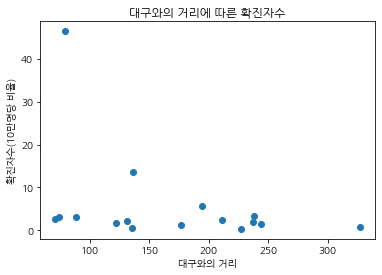

In [36]:
dis=[]
con=[]
for i in last_confirmed:
    dis.append(distance_from_Daegu[i])
    con.append(last_confirmed[i])
plt.scatter(dis,con)

#for i in last_confirmed:
#    plt.annotate(i,
#                xy=(distance_from_Daegu[i],last_confirmed[i]),
#                xytext=(5,-5),
#                textcoords='offset points')
plt.title('대구와의 거리에 따른 확진자수')
plt.xlabel('대구와의 거리')
plt.ylabel('확진자수(10만명당 비율)')

별로 상관이 없는듯 보인다.. 다른지역도 해보기 위해 위코드를 함수로 만들어 보았다.

In [37]:
def dis_con(province):
    lat_lon={}
    for i in region.index:
        lat_lon[i]=[region.loc[i]['latitude'],region.loc[i]['longitude']]
    distance_from_province={}
    #편의를 위해 소수점은 제거하겠다
    for i in lat_lon:
        distance_from_province[i]=round(haversine(lat_lon[i],lat_lon[province]))
    
    del distance_from_province[province]
    last_confirmed={}
    last=time_province.tail(17)
    last=last.set_index('province')
    for i in last.index:
        last_confirmed[i]=last.loc[i]['pocp']
    del last_confirmed[province]
    dis=[]
    con=[]
    for i in last_confirmed:
        dis.append(distance_from_province[i])
        con.append(last_confirmed[i])
    return plt.scatter(dis,con)

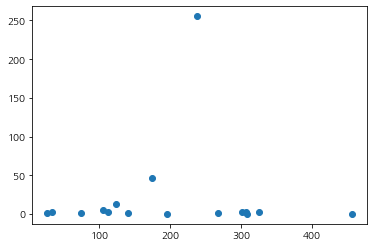

In [38]:
dis_con('Seoul')

대구 대문에 다른 값들이 너무 작아져 그냥 대구를 지우겠다

In [39]:
def dis_con(province):
    lat_lon={}
    for i in region.index:
        lat_lon[i]=[region.loc[i]['latitude'],region.loc[i]['longitude']]
    distance_from_province={}
    #편의를 위해 소수점은 제거하겠다
    for i in lat_lon:
        distance_from_province[i]=round(haversine(lat_lon[i],lat_lon[province]))
    
    del distance_from_province[province]
    last_confirmed={}
    last=time_province.tail(17)
    last=last.set_index('province')
    for i in last.index:
        last_confirmed[i]=last.loc[i]['pocp']
    del last_confirmed[province]
    #대구,경북값이 너무커 제거
    del last_confirmed['Daegu']
    del distance_from_province['Daegu']
    del last_confirmed['Gyeongsangbuk-do']
    del distance_from_province['Gyeongsangbuk-do']
    
    dis=[]
    con=[]
    for i in last_confirmed:
        dis.append(distance_from_province[i])
        con.append(last_confirmed[i])
    return plt.scatter(dis,con)

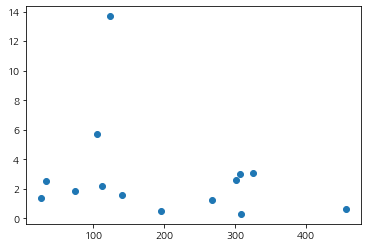

In [40]:
dis_con('Seoul')

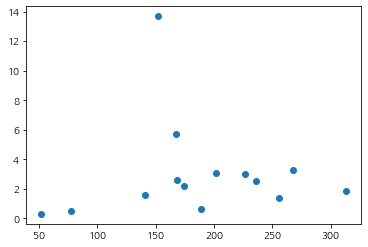

In [41]:
dis_con('Gwangju')

그나마 느낌이있다.

별로 뚜렷한 관계가 보이는 것은 없었다. 그나마 광주가 연관성이 있어 보였다(대구,경북,세종 제외)이유가뭘까

## 교통량에따른 확진자

단순거리로는 뚜렷한 관계가 나오지않아 교통량으로 계산해보자
교통량으로 쓸데이터는 
- 지역내 대중교통 이용량(2019년 요일별 평균)
- 지역간 대중교통 이용량(2019년 요일별 평균)
- 국외선  항공량(지역별로 나오지않아서 보류)
- 국내선 항공량
- 톨게이트 이용
- 지역내에서 자가용을 이용한 교통량을 찾기 힘들다
- 모두 연간,월간기록이라 매일 달라지는 코로나 데이터와 연관성르 찾을 수 있을지 모르겠다
- 일단 평균값을 이용해 접근하려고 한다

### 국내선 이용량

19년 11월 부터 20년 2월까지의 월간 공항별 도착승객,출발승객,총승객이 있다.
공항은 김포,김해,대구.무안,인천,제주,청주,양양 이렇게 있다.
- 데이터를 활용하기 위해 각 공항을 각 도시가 있는 도 이름으로 바꿨다.

In [42]:
domestic_flight=pd.read_csv('data/domesticflight.csv',engine='python')
def convert(airport):
    if airport=='김포':
        return 'Gyeonggi-do'
    elif airport=='김해':
        return 'Gyeongsangnam-do'
    elif airport=='대구':
        return 'Daegu'
    elif airport=='무안':
        return 'Jeollanam-do'
    elif airport=='인천':
        return 'Incheon'
    elif airport=='청주':
        return 'Chungcheongnam-do'
    elif airport=='양양':
        return 'Gangwon-do'
    elif airport=='제주':
        return 'Jeju-do'
    else:
        return airport

In [43]:
domestic_flight['airport']=domestic_flight['airport'].apply(convert)

In [44]:
domestic_flight

,Unnamed: 0,month,airport,arrFlight,depFlight,flights
0,0,201911,Gyeonggi-do,817,817,1634
1,1,201911,Gyeongsangnam-do,2269,2272,4541
2,2,201911,Daegu,561,562,1123
3,3,201911,Jeollanam-do,124,124,248
4,4,201911,Incheon,14232,14240,28472
5,5,201911,Jeju-do,769,765,1534
6,6,201911,Chungcheongnam-do,113,114,227
7,7,201912,Gyeonggi-do,868,868,1736
8,8,201912,Gyeongsangnam-do,2485,2478,4963
9,9,201912,Daegu,543,546,1089


4개월치 평균값을 내보았다.

In [45]:
domestic=domestic_flight.groupby('airport').mean()['flights']

In [46]:
domestic

airport
Chungcheongnam-do      164.750000
Daegu                  984.250000
Gangwon-do              48.666667
Gyeonggi-do           1625.750000
Gyeongsangnam-do      4545.000000
Incheon              28562.500000
Jeju-do               1292.000000
Jeollanam-do           220.500000
Name: flights, dtype: float64

In [47]:
last_confirmed={}
last=time_province.tail(17)
last=last.set_index('province')
for i in last.index:
    last_confirmed[i]=last.loc[i]['pocp']

(array([-5000.,     0.,  5000., 10000., 15000., 20000., 25000., 30000.]),
 <a list of 8 Text xticklabel objects>)

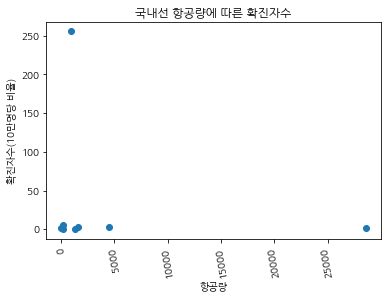

In [48]:
#domestic.drop('Daegu',inplace=True)
num=[]
con=[]
for i in domestic.index:
    num.append(domestic[i])
    con.append(last_confirmed[i])
plt.scatter(num,con)

#for i in last_confirmed:
#    plt.annotate(i,
#                xy=(distance_from_Daegu[i],last_confirmed[i]),
#                xytext=(5,-5),
#                textcoords='offset points')
plt.title('국내선 항공량에 따른 확진자수')
plt.xlabel('항공량')
plt.ylabel('확진자수(10만명당 비율)')
plt.xticks(rotation=100)

대구와 인천이 확진자 수와 항공량에서 압도적이라 둘을 빼고 보았다

(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.]),
 <a list of 7 Text xticklabel objects>)

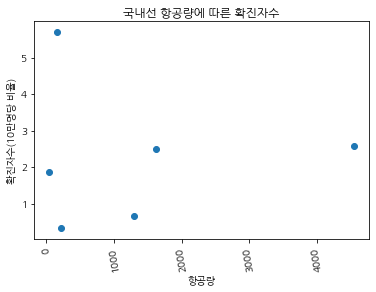

In [49]:
domestic.drop(['Daegu','Incheon'],inplace=True)
num=[]
con=[]
for i in domestic.index:
    num.append(domestic[i])
    con.append(last_confirmed[i])
plt.scatter(num,con)

#for i in last_confirmed:
#    plt.annotate(i,
#                xy=(distance_from_Daegu[i],last_confirmed[i]),
#                xytext=(5,-5),
#                textcoords='offset points')
plt.title('국내선 항공량에 따른 확진자수')
plt.xlabel('항공량')
plt.ylabel('확진자수(10만명당 비율)')
plt.xticks(rotation=100)

인천,대구지역으 포함한 데이터만 봐도 항공량과 확진자 사이에 연관성은 없어보인다. 연관이 있었다면 대구야 다른 원인으로 확진자가 급증했다고 쳐도 인천같은 경우는 항공량 대비 확진자가 너무 적다. 국내선 항공량은 별의미가 없고 국외선을 봐야할 것 같다.

항공

In [50]:
domestic=domestic_flight.groupby('month').mean()

In [51]:
domestic

,Unnamed: 0,arrFlight,depFlight,flights
month,,,,
201911,3.0,2697.857143,2699.142857,5397.000
201912,10.5,2540.000000,2540.375000,5080.375
202001,18.5,2614.500000,2615.000000,5229.500
202002,26.5,1845.250000,1838.125000,3683.375


2월달에 항공량이 확 줄은 모습이다. 아마 2월 중순쯤에 대구에서 코로나 환자가 급증한 영향이 있는것 같다. 코로나가 시잔된 1월달엔 전달에 비해 이용량이 늘어났다 아마 경각심이 없었던 시기인듯하다. 2월초에도 정상적으로 운영 했을텐데 눈에 보일 정도로 이용량이 줄어든것을 보니 2월 중순이후로는 현저히 줄인것 같다. 3월달 자료가 궁금하다

### 교통량

- 지역내 대중교통 이용량
- 지역간 시외버스,시내버스,철도 이용량
- 기점,종점이 기준 시외버스,시내버스,철도 이용량

### 지역내 대중교통 이용량

먼저 지역내 대중교통 이용량과 확진자수와의 관계를보자

파일들의 지역이 모두 한글이므로 영어로 바꿔주는함수를 하나 만들자

In [52]:
trans=pd.read_csv('data/지역별 대중교통(2019).csv',engine='python',header=3)
trans.head(17)

,Unnamed: 0,월,화,수,목,금,토,일
0,전체,"11,459,916","11,545,432","11,657,576","11,518,342","11,958,311","9,493,453","7,303,182"
1,서울특별시,"4,343,223","4,396,946","4,432,399","4,371,111","4,550,668","3,613,517","2,848,444"
2,부산광역시,"1,040,293","1,051,389","1,057,331","1,068,119","1,088,958","926,661","711,771"
3,대구광역시,"494,546","499,173","503,540","500,561","503,901","437,091","327,279"
4,인천광역시,"777,999","782,655","791,987","771,217","806,456","639,645","490,962"
5,광주광역시,"214,886","216,574","220,360","218,310","223,253","167,846","127,180"
6,대전광역시,"250,447","252,601","255,794","255,067","269,584","209,078","161,183"
7,울산광역시,"140,918","140,446","141,083","140,443","145,238","112,978","82,780"
8,세종특별자치시,"27,320","27,503","28,257","27,890","30,519","20,297","15,614"
9,경기도,"2,964,547","2,981,970","3,016,620","2,956,798","3,085,161","2,403,144","1,806,326"


In [53]:
def con_en(p):
    if p=='서울특별시':
        return 'Seoul'
    elif p=='부산광역시':
        return 'Busan'
    elif p=='대구광역시':
        return 'Daegu'
    elif p== '인천광역시':
        return 'Incheon'
    elif p=='광주광역시':
        return 'Gwangju'
    elif p=='대전광역시':
        return 'Daejeon'
    elif p=='울산광역시':
        return 'Ulsan'
    elif p=='세종특별자치시':
        return 'Sejong'
    elif p=='경기도':
        return 'Gyeonggi-do'
    elif p=='강원도':
        return 'Gangwon-do'
    elif p=='충청북도':
        return 'Chungcheongbuk-do'
    elif p=='충청남도':
        return 'Chungcheongnam-do'
    elif p=='전라북도':
        return 'Jeollabuk-do'
    elif p=='전라남도':
        return 'Jeollanam-do'
    elif p=='경상북도':
        return 'Gyeongsangbuk-do'
    elif p=='경상남도':
        return 'Gyeongsangnam-do'
    elif p=='제주특별자치도':
        return 'Jeju-do'
    else:
        return p


In [54]:
trans['province']=trans['Unnamed: 0']
trans.drop('Unnamed: 0',axis=1,inplace=True)

In [55]:
#전체값 삭제
trans.drop(0,axis=0,inplace=True)
#con()적용
trans['province']=trans['province'].apply(con)

trans

ValueError: no results

데이터가 string이므로 int로 바꿔주자

In [56]:

def str_to_int(string):
    if type(string)==str:
        a=string.split(',')
        b=''
        for i in a:
            b+=i
        return int(b)
    else:
        return string
day=['월','화','수','목','금','토','일']
for i in day:
    trans[i]=trans[i].apply(str_to_int)

In [57]:
trans

,월,화,수,목,금,토,일,province
1,4343223,4396946,4432399,4371111,4550668,3613517,2848444,서울특별시
2,1040293,1051389,1057331,1068119,1088958,926661,711771,부산광역시
3,494546,499173,503540,500561,503901,437091,327279,대구광역시
4,777999,782655,791987,771217,806456,639645,490962,인천광역시
5,214886,216574,220360,218310,223253,167846,127180,광주광역시
6,250447,252601,255794,255067,269584,209078,161183,대전광역시
7,140918,140446,141083,140443,145238,112978,82780,울산광역시
8,27320,27503,28257,27890,30519,20297,15614,세종특별자치시
9,2964547,2981970,3016620,2956798,3085161,2403144,1806326,경기도
10,93614,92875,95273,91769,98044,74692,57670,강원도


계산하기 쉽게 월화수목금토일 평균을 내자

In [58]:

trans['mean']=round((trans['월']+trans['화']+trans['수']+trans['목']+trans['금']+trans['토']+trans['일'])/7)
trans

,월,화,수,목,금,토,일,province,mean
1,4343223,4396946,4432399,4371111,4550668,3613517,2848444,서울특별시,4079473.0
2,1040293,1051389,1057331,1068119,1088958,926661,711771,부산광역시,992075.0
3,494546,499173,503540,500561,503901,437091,327279,대구광역시,466584.0
4,777999,782655,791987,771217,806456,639645,490962,인천광역시,722989.0
5,214886,216574,220360,218310,223253,167846,127180,광주광역시,198344.0
6,250447,252601,255794,255067,269584,209078,161183,대전광역시,236251.0
7,140918,140446,141083,140443,145238,112978,82780,울산광역시,129127.0
8,27320,27503,28257,27890,30519,20297,15614,세종특별자치시,25343.0
9,2964547,2981970,3016620,2956798,3085161,2403144,1806326,경기도,2744938.0
10,93614,92875,95273,91769,98044,74692,57670,강원도,86277.0


- 그냥 이용량만 보기에는 지역별로 사는 인원수가 다르니 확진자 비율과 똑같이 10만명기준 이용인원으로 만들어보자
- 위에서 사용한 con_ratio()를 사용하자

In [59]:

trans['num_of_citizen']=trans['province'].apply(con_ratio)
#소수 2번째 자리까지만 표현
trans['pocp_trans']=round(trans['mean']/trans['num_of_citizen']*aaa*10)
trans

KeyError: '서울특별시'

In [60]:
trans_pocp=trans.groupby('province').sum()['pocp_trans']

KeyError: 'pocp_trans'

In [61]:
num=[]
con=[]


for i in trans_pocp.index:
    num.append(trans_pocp[i])
    con.append(last_confirmed[i])
plt.scatter(num,con)

plt.title('지역내 대중교통이용량 따른 확진자수')
plt.xlabel('대중교통이용량')
plt.ylabel('확진자수(10만명당 비율)')
plt.xticks(rotation=100)

NameError: name 'trans_pocp' is not defined

In [62]:
num=[]
con=[]
trans_pocp.drop(['Daegu','Gyeongsangbuk-do'],inplace=True)

for i in trans_pocp.index:
    num.append(trans_pocp[i])
    con.append(last_confirmed[i])
plt.scatter(num,con)

plt.title('지역내 대중교통이용량 따른 확진자수')
plt.xlabel('대중교통이용량')
plt.ylabel('확진자수(10만명당 비율)')
plt.xticks(rotation=100)

NameError: name 'trans_pocp' is not defined

연관성이 없어보인다... 내가 할수 있을까

### 지역간 대중교통 이용

지역간을 다니는 철도,시외버스,시내버스의 2019년 요일별 평균이용량이 있다. 

In [63]:
express=pd.read_csv('data/지역간 고속버스 이용량.csv',engine='python',header=3)
intercity=pd.read_csv('data/지역간 시외버스 이용량.csv',engine='python',header=3)
rail=pd.read_csv('data/지역간 철도이용량.csv',engine='python',header=3)

위에 정리한 식을 똑같이 할려고 한다.

In [64]:
express.loc[17]['월']

'- '

In [65]:
express['province']=express['Unnamed: 0']
express.drop('Unnamed: 0',axis=1,inplace=True)
#전체값 삭제
express.drop(0,axis=0,inplace=True)
#con적용
express['province']=express['province'].apply(con_en)
#'-'를 처리하기 위해 약간 변경을 했다
def str_to_int(string):
    if '-' in string:
        return 0
    else:
        a=string.split(',')
        b=''
        for i in a:
            b+=i
        return int(b)
day=['월','화','수','목','금','토','일']
for i in day:
    express[i]=express[i].apply(str_to_int)
express['mean']=round((express['월']+express['화']+express['수']+express['목']+express['금']+express['토']+express['일'])/7)
express['num_of_citizen']=express['province'].apply(con_ratio)
#소수 2번째 자리까지만 표현
express['pocp_express']=round(express['mean']/express['num_of_citizen']*aaa*10)
express=express.groupby('province').sum()['pocp_express']


(array([-200.,    0.,  200.,  400.,  600.,  800., 1000.]),
 <a list of 7 Text xticklabel objects>)

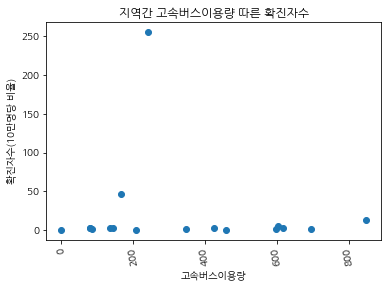

In [66]:

num=[]
con=[]


for i in express.index:
    num.append(express[i])
    con.append(last_confirmed[i])
plt.scatter(num,con)

plt.title('지역간 고속버스이용량 따른 확진자수')
plt.xlabel('고속버스이용량')
plt.ylabel('확진자수(10만명당 비율)')
plt.xticks(rotation=100)

In [67]:
express

province
Busan                136.0
Chungcheongbuk-do    425.0
Chungcheongnam-do    604.0
Daegu                240.0
Daejeon              599.0
Gangwon-do           346.0
Gwangju              694.0
Gyeonggi-do           79.0
Gyeongsangbuk-do     166.0
Gyeongsangnam-do     144.0
Incheon               86.0
Jeju-do                0.0
Jeollabuk-do         458.0
Jeollanam-do         208.0
Sejong               848.0
Seoul                617.0
Ulsan                 80.0
Name: pocp_express, dtype: float64

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000.]),
 <a list of 7 Text xticklabel objects>)

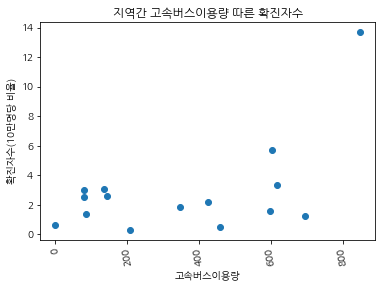

In [68]:
express.drop(['Daegu','Gyeongsangbuk-do'],axis=0,inplace=True)
num=[]
con=[]


for i in express.index:
    num.append(express[i])
    con.append(last_confirmed[i])
plt.scatter(num,con)

plt.title('지역간 고속버스이용량 따른 확진자수')
plt.xlabel('고속버스이용량')
plt.ylabel('확진자수(10만명당 비율)')
plt.xticks(rotation=100)

여기까지 했을 때 이게 의미가 있나 싶다 다른지표들도 비슷할것같다,,

그래서 확진자 비율이 비슷한 곳끼리 묶어서 특징을 살펴볼라고 한다.

### 기종점별 교통량

In [69]:
express2=pd.read_csv('data/기종점OD.csv',engine='python',header=3)
intercity2=pd.read_csv('data/기종점OD 시외버스.csv',engine='python',header=3)
rail2=pd.read_csv('data/기종점OD 철도.csv',engine='python',header=3)
lis=[express2,intercity2,rail2]

In [70]:
i=express2
i['start']=i['Unnamed: 0']
i.drop('Unnamed: 0',axis=1,inplace=True)
i['end']=i['Unnamed: 1']
i.drop('Unnamed: 1',axis=1,inplace=True)
#con적용
i['start']=i['start'].apply(con_en)
i['end']=i['end'].apply(con_en)
#'-'를 처리하기 위해 약간 변경을 했다

for j in day:
    i[j]=i[j].apply(str_to_int)
express2=i

In [71]:
i

,월,화,수,목,금,토,일,start,end
0,991,678,711,826,1737,2186,1865,Seoul,Busan
1,1050,799,829,840,2050,2632,2197,Seoul,Daegu
2,2226,1776,1749,2028,4239,5806,4608,Seoul,Gwangju
3,3840,3218,3312,3589,6909,9900,8333,Seoul,Daejeon
4,366,234,221,267,504,646,618,Seoul,Ulsan
...,...,...,...,...,...,...,...,...,...
166,9,5,10,1,27,16,19,Gyeongsangnam-do,Gangwon-do
167,8,4,4,10,11,9,18,Gyeongsangnam-do,Chungcheongnam-do
168,37,25,52,43,55,63,111,Gyeongsangnam-do,Jeollanam-do
169,32,20,18,30,64,32,43,Gyeongsangnam-do,Gyeongsangbuk-do


In [72]:
#for i in lis:
#    i['start']=i['Unnamed: 0']
#    i.drop('Unnamed: 0',axis=1,inplace=True)
#    i['end']=i['Unnamed: 1']
#    i.drop('Unnamed: 1',axis=1,inplace=True)
#    #con적용
#    i['start']=i['start'].apply(con_en)
#    i['end']=i['end'].apply(con_en)
#    #'-'를 처리하기 위해 약간 변경을 했다
    
#    for j in day:
#        i[j]=i[j].apply(str_to_int)

In [73]:
i=rail2
i['start']=i['Unnamed: 0']
i.drop('Unnamed: 0',axis=1,inplace=True)
i['end']=i['Unnamed: 1']
i.drop('Unnamed: 1',axis=1,inplace=True)
#con적용
i['start']=i['start'].apply(con_en)
i['end']=i['end'].apply(con_en)
#'-'를 처리하기 위해 약간 변경을 했다

for j in day:
    i[j]=i[j].apply(str_to_int)
rail2=i

In [74]:
i=intercity2
i['start']=i['Unnamed: 0']
i.drop('Unnamed: 0',axis=1,inplace=True)
i['end']=i['Unnamed: 1']
i.drop('Unnamed: 1',axis=1,inplace=True)
#con적용
i['start']=i['start'].apply(con_en)
i['end']=i['end'].apply(con_en)
#'-'를 처리하기 위해 약간 변경을 했다

for j in day:
    i[j]=i[j].apply(str_to_int)
intercity2=i

In [75]:
all2=pd.concat(lis)

In [76]:
all2

,월,화,수,목,금,토,일,start,end
0,991,678,711,826,1737,2186,1865,Seoul,Busan
1,1050,799,829,840,2050,2632,2197,Seoul,Daegu
2,2226,1776,1749,2028,4239,5806,4608,Seoul,Gwangju
3,3840,3218,3312,3589,6909,9900,8333,Seoul,Daejeon
4,366,234,221,267,504,646,618,Seoul,Ulsan
...,...,...,...,...,...,...,...,...,...
166,9,5,10,1,27,16,19,Gyeongsangnam-do,Gangwon-do
167,8,4,4,10,11,9,18,Gyeongsangnam-do,Chungcheongnam-do
168,37,25,52,43,55,63,111,Gyeongsangnam-do,Jeollanam-do
169,32,20,18,30,64,32,43,Gyeongsangnam-do,Gyeongsangbuk-do


In [77]:
all2=all2.groupby(['start','end']).sum()

In [78]:
all2

월     화     수     목     금     토     일
start end                                                        
Busan Chungcheongbuk-do   462   219   243   387   498   585  1038
      Chungcheongnam-do   162    81   123   108   159   222   381
      Daegu              1308  1128  1023  1521  2418  3435  2781
      Daejeon             171   138    93   129   336   339   471
      Gwangju            2382  2034  1854  2244  4233  5190  5601
...                       ...   ...   ...   ...   ...   ...   ...
Ulsan Gwangju             333   306   228   351   684   744   648
      Gyeongsangbuk-do      0     3     0     3     0     0     0
      Jeollabuk-do        183   114   114   117   420   324   330
      Jeollanam-do          3     3     9     6    18     3     6
      Seoul               951   627   690   615  1188  1434  1842

[171 rows x 7 columns]

In [79]:
all2['mean']=round((all2['월']+all2['화']+all2['수']+all2['목']+all2['금']+all2['토']+all2['일'])/7)
all2

월     화     수     목     금     토     일    mean
start end                                                                
Busan Chungcheongbuk-do   462   219   243   387   498   585  1038   490.0
      Chungcheongnam-do   162    81   123   108   159   222   381   177.0
      Daegu              1308  1128  1023  1521  2418  3435  2781  1945.0
      Daejeon             171   138    93   129   336   339   471   240.0
      Gwangju            2382  2034  1854  2244  4233  5190  5601  3363.0
...                       ...   ...   ...   ...   ...   ...   ...     ...
Ulsan Gwangju             333   306   228   351   684   744   648   471.0
      Gyeongsangbuk-do      0     3     0     3     0     0     0     1.0
      Jeollabuk-do        183   114   114   117   420   324   330   229.0
      Jeollanam-do          3     3     9     6    18     3     6     7.0
      Seoul               951   627   690   615  1188  1434  1842  1050.0

[171 rows x 8 columns]

In [80]:
daegu2=all2.loc['Daegu']['mean']
daegu2

end
Busan                1919.0
Chungcheongbuk-do     504.0
Daejeon               571.0
Gangwon-do            617.0
Gwangju              1286.0
Gyeonggi-do          1380.0
Gyeongsangbuk-do     3566.0
Gyeongsangnam-do     1490.0
Incheon               689.0
Jeollabuk-do          460.0
Jeollanam-do          322.0
Seoul                4127.0
Ulsan                 969.0
Name: mean, dtype: float64

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.,
        4500.]), <a list of 10 Text xticklabel objects>)

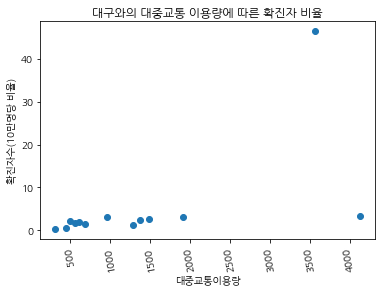

In [81]:
num=[]
con=[]

for i in daegu2.index:
    num.append(daegu2[i])
    con.append(last_confirmed[i])
plt.scatter(num,con)

plt.title('대구와의 대중교통 이용량에 따른 확진자 비율')
plt.xlabel('대중교통이용량')
plt.ylabel('확진자수(10만명당 비율)')
plt.xticks(rotation=100)

c:\users\최선안\appdata\local\programs\python\python36\lib\site-packages\pandas\core\generic.py:3939: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(obj)


(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.,
        4500.]), <a list of 10 Text xticklabel objects>)

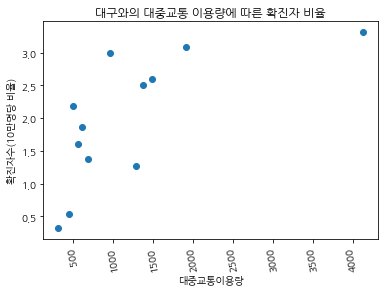

In [82]:
daegu2.drop('Gyeongsangbuk-do',inplace=True)
num=[]
con=[]

for i in daegu2.index:
    num.append(daegu2[i])
    con.append(last_confirmed[i])
plt.scatter(num,con)

plt.title('대구와의 대중교통 이용량에 따른 확진자 비율')
plt.xlabel('대중교통이용량')
plt.ylabel('확진자수(10만명당 비율)')
plt.xticks(rotation=100)

어느정도 선형적인 모습이다 만세!
세종과 제주는 대중교통 이용량이 적어 데이터가 존재하지 않는다.

## 지역별로 묶어볼까?

이런 저런 테이터들로 시각화를 해봤을때 딱히 확진자수와 연관있어 보이는 점을 찾기가 힘들었다. 그이유를 생각해보았다.
- 실제로 항공량과 대중교통 이용량은 확진자 수와 연관성이 없는건가?
- 편차가 심한 지역이 있어 시각화를 하면 연관성을 찾기 힘들다.

그래서 한번 지역끼리 묶어 특징을 찾아볼려고한다.일단은 2가지 방법을 생각했다.
- 확진자 증가 추세가 비슷한 지역
- 확진자 비율이 비슷한 지역

#### 확진자 증가추세

corr()를 이용해 각 지역별 연관성을 통해 증가추세가 비슷한 지역을 찾아보았다.

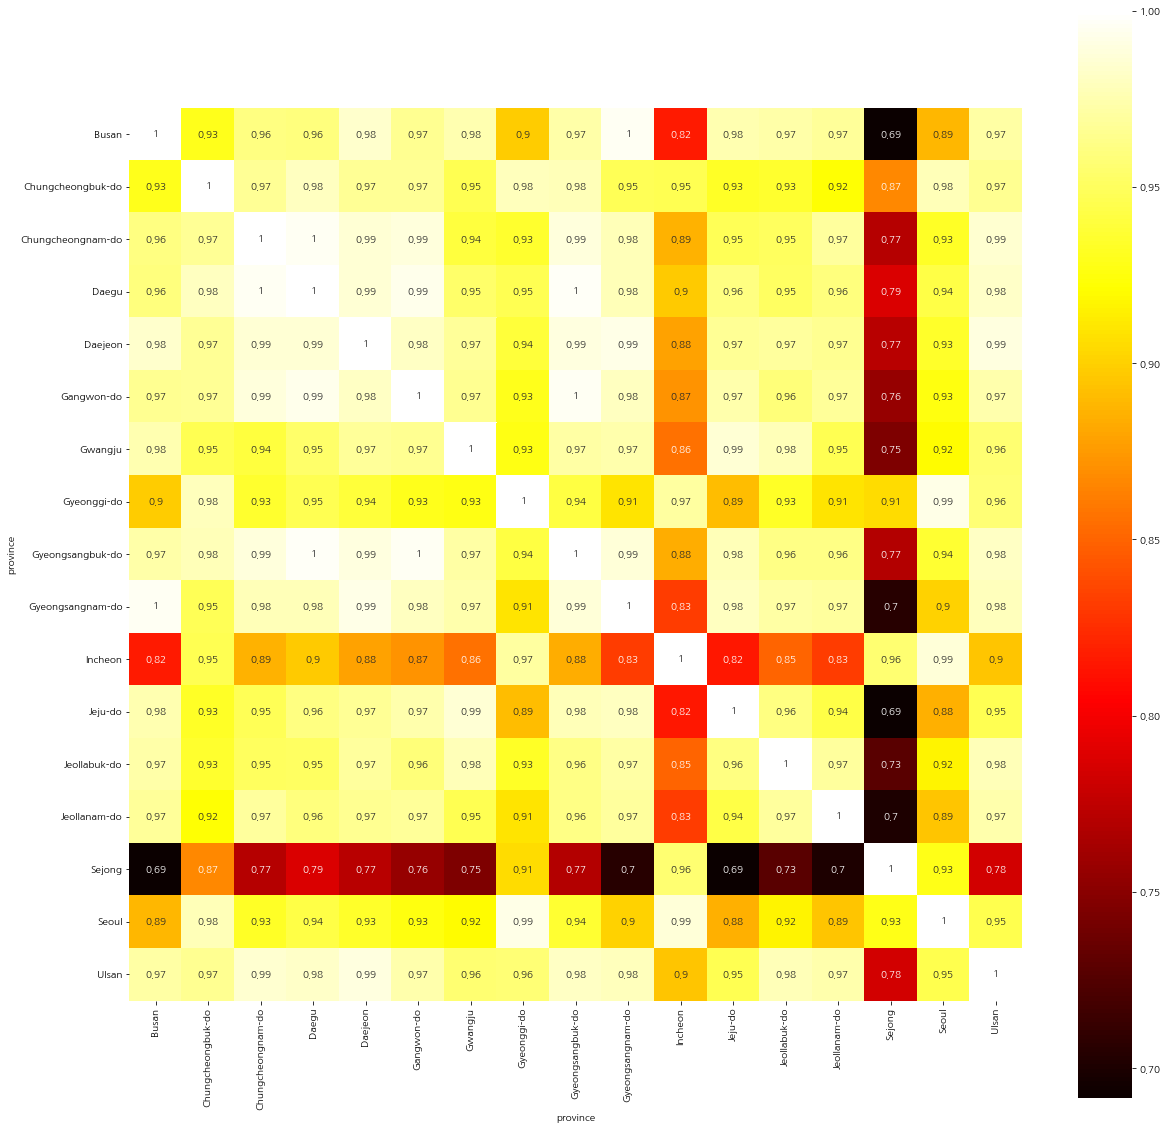

In [337]:
corr=pd.pivot_table(time_province,index='date',columns='province')['pocp'].corr()
plt.figure(figsize=(20,20))
df_heatmap=sns.heatmap(corr,cbar=True,annot=True,
                     annot_kws={'size':10},square=True,cmap='hot')

색이 얕고 숫자가 1에 가까울 수록 연관성이 높고 색이 진하고 숫자가 0에 가까울 수록 연관성이 작다. 여기 데이터는 전부 증가하는 추세이기 때문에 음적관계는 없다,

참고로
- 0.7~1 :강한 양적관계
- 0.3~0.7:뚜렷한 양적관계
- 0.1~0.3:약한 양적관계
- 0~0.1:관계 거의 없음
- 음수이면 음적관계(절댓값 사용하면됨)

히트맵을 보면 눈에 띄는건 세종시만 가장 모든 도시와 연관성이 작아보이는데 아무리 작아도 0.7부근은 유지하고 있음을 알 수 있다.
아마 전국적으로 코로나 지역별 확진자 증가추이는 비슷한듯 하다..

세종시만 유일하게 연관성이 적은 이유는 확진자가 1명인 상태를 계속 유지하다가 갑자기 몇십명가량이 늘어서 그런것 같다.
인천시도 세종시보단 아니지만 연관성이적은데 아마 공항에서 외국인이 들어와서 그런게 아닐까 싶다 .

연관성이 다들 너무 높아서 분류하기가 너무 애매하다 그래도 나름대로 분류를 해보았다.

- 부산,경남     -1
- 서울,경기,인천(애매하다)-2
- 대구,경북,충남,강원(의외) -3
- 충북(애매하게 높은게 많다.) 경기도,서울 대구경북쪽 둘다 높다
- 울산  비슷한 숫자들이 많다. 부산경남,대구경북쪽 둘다 높다
- 세종  그나마 서울,경기,인천쪽 이랑 가장높다 -4
- 대전  비슷한 숫자들이 많다. 울산이랑 경향이 비슷
- 전남,광주,전북,제주  표본이 적어 빼줄까 생각중

울산,대전,충북 처리가 애매하다 충북은 모든곳과 두루두루 비슷해서 논외로 친다해도..
울산,대전은 1,3번 둘다 가깝다
근데 1번과3번도 연관성이 높긴하다
이걸 다묶어야하나

In [23]:
last

,date,time,confirmed,released,deceased,num_of_citizen,pocp
province,,,,,,,
Seoul,2020-03-22,0,324,64,0,9800000,3.31
Busan,2020-03-22,0,108,69,1,3500000,3.09
Daegu,2020-03-22,0,6387,2107,75,2500000,255.48
Incheon,2020-03-22,0,40,8,0,2900000,1.38
Gwangju,2020-03-22,0,19,10,0,1500000,1.27
Daejeon,2020-03-22,0,24,6,0,1500000,1.60
Ulsan,2020-03-22,0,36,12,0,1200000,3.00
Sejong,2020-03-22,0,41,3,0,300000,13.67
Gyeonggi-do,2020-03-22,0,337,82,3,13500000,2.50


- 대구 255
- 경북 46
- 세종 14
- 충남 5.7
- 서울,부산,울산3초반대
- 경기도,경남 2중반
- 충북,강원,대전,인천,광주, 2초반 1이상
- 제주,전북,전남 1이하

3등분을 할까 4등분을 할까 고민이됩니다..대구는 논외로할까..

- 대구,경북,세종,충남 -4
- 서울,부산,울산,경기도,경남 -3
- 충북,강원,대전,인천,광주 -2
- 제주,전북,전남 -1